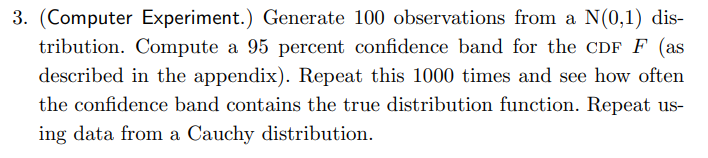

In [5]:
import numpy as np
from scipy.stats import norm, cauchy
import matplotlib.pyplot as plt


In [318]:
n = 100
m = 1

Zs = np.random.randn(n, m)

def Fhat(x, Z, alpha = 0.05):
    N = len(x)
    n, m = Z.shape
    Z = np.broadcast_to(np.reshape(Z, (1, n, m)), (N, n, m))
    x = np.broadcast_to(np.reshape(x, (N, 1, 1)), (N, n, m))
    trues = (Z<=x)
    Fh = np.sum(trues, axis = 1)/n

    epsilon = np.sqrt(np.log(2 / alpha) / (2 * n))
    U = np.fmin(Fh + epsilon, 1)
    L = np.fmax(Fh - epsilon, 0)
    return Fh, L, U

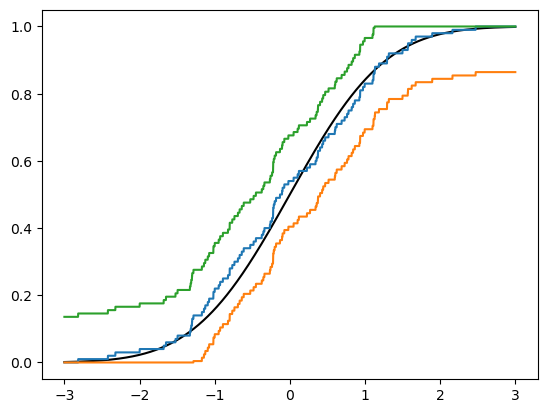

In [192]:
x = np.linspace(-3, 3, 10000)
y, L, U = Fhat(x, Zs)
y_true = norm.cdf(x)

plt.plot(x, y_true, color = 'k')
plt.plot(x, y)
plt.plot(x, L)
plt.plot(x, U)
plt.show()

In [196]:
n=100
m=1000

Zss = np.random.randn(n, m)

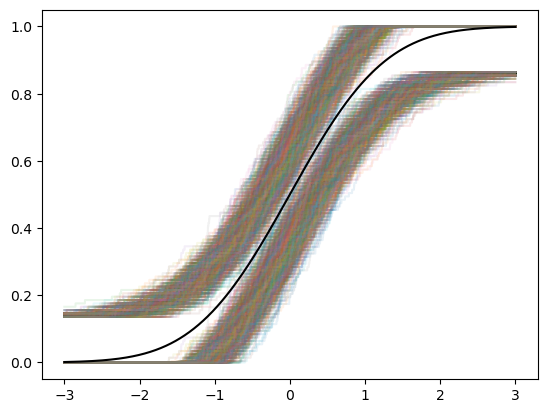

In [197]:
x = np.linspace(-3, 3, 10000)
y, L, U = Fhat(x, Zss)

y_true = norm.cdf(x)

#plt.plot(x, y)
plt.plot(x, L, alpha = 0.1)
plt.plot(x, U, alpha = 0.1)
plt.plot(x, y_true, color = 'k')
plt.show()

In [198]:
def inrange(L, F, U):
    N, m = L.shape
    F = np.broadcast_to(np.reshape(F, (N,1)), (N, m))
    lowers = (L < F)
    uppers = (F < U)
    inside = np.logical_and(lowers, uppers)
    isinside = np.equal(np.sum(inside, axis=0), N)
    return isinside


In [199]:
inranges = inrange(L, y_true, U)
print("proportion inside confidence interval = ", np.sum(inranges)/m)

proportion inside confidence interval =  0.949


In [219]:
x = np.linspace(-5, 5, 10000)

(100, 1)


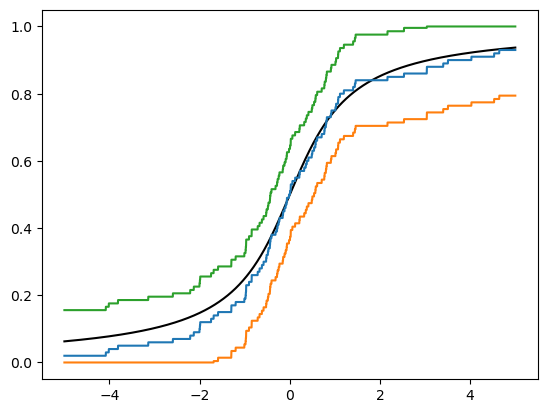

In [220]:
n = 100
m = 1

Cs = cauchy.rvs(size = (n, m))
print(Cs.shape)

y_true = cauchy.cdf(x)
y, L, U = Fhat(x, Cs)

plt.plot(x, y_true, color = 'k')
plt.plot(x, y)
plt.plot(x, L)
plt.plot(x, U)
plt.show()

(100, 100)


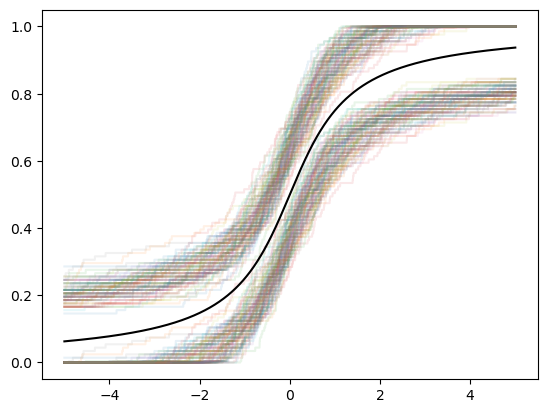

In [221]:
n = 100
m = 100

Css = cauchy.rvs(size = (n, m))
print(Css.shape)

y_true = cauchy.cdf(x)
y, L, U = Fhat(x, Css)

#plt.plot(x, y)
plt.plot(x, L, alpha = 0.1)
plt.plot(x, U, alpha = 0.1)
plt.plot(x, y_true, color = 'k')
plt.show()

In [222]:
inranges = inrange(L, y_true, U)
print("proportion inside confidence interval = ", np.sum(inranges)/m)

proportion inside confidence interval =  0.96


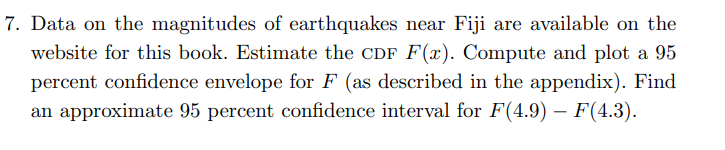

In [223]:
import pandas as pd

In [271]:
eq_data = pd.read_csv('Fiji_Earthquate_Data.txt', sep='\t')
print(eq_data.head())
eq_data.describe()


,Obs.,lat,long,depth,mag,stations
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,-20.642750,179.462020,311.371000,4.620400,33.418000
std,288.819436,5.028791,6.069497,215.535498,0.402773,21.900386
min,1.000000,-38.590000,165.670000,40.000000,4.000000,10.000000
25%,250.750000,-23.470000,179.620000,99.000000,4.300000,18.000000
50%,500.500000,-20.300000,181.410000,247.000000,4.600000,27.000000
75%,750.250000,-17.637500,183.200000,543.000000,4.900000,42.000000
max,1000.000000,-10.720000,188.130000,680.000000,6.400000,132.000000


In [270]:
mag_data=eq_data.mag.to_numpy()
mag_data = np.reshape(mag_data, (len(mag_data), 1))
print(mag_data.shape)

(1000, 1)


In [319]:
x = np.linspace(3.5, 6.5, 10000)
Fmag, Lmag, Umag = Fhat(x, mag_data)

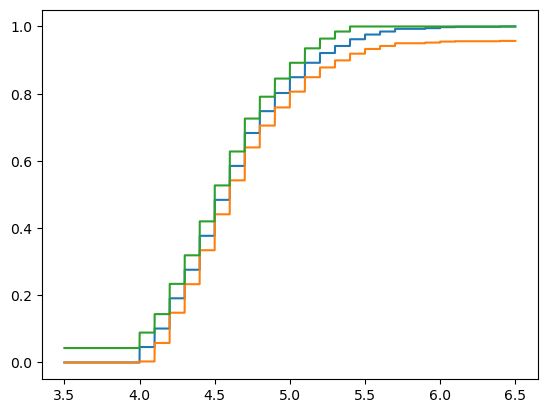

In [320]:
plt.plot(x, Fmag)
plt.plot(x, Lmag)
plt.plot(x, Umag)
plt.show()


This bit depends a lot on the definition of F and whether we take < or <=. This version uses the Fhat method defined earlier which uses <=

In [321]:
F2, _, _ = Fhat([4.9], mag_data)
F1, _, _ = Fhat([4.3], mag_data)
that = float((F2 - F1))

In [322]:
se = np.sqrt(that * (1 - that) / 1000)

C0 = that + norm.ppf(0.025)*se
C1 = that + norm.ppf(0.975)*se

In [323]:
print("theta is estimated to be {:.3f} with a 95% confidence interval of ({:.3f}, {:.3f})".format(that, C0, C1))

theta is estimated to be 0.526 with a 95% confidence interval of (0.495, 0.557)


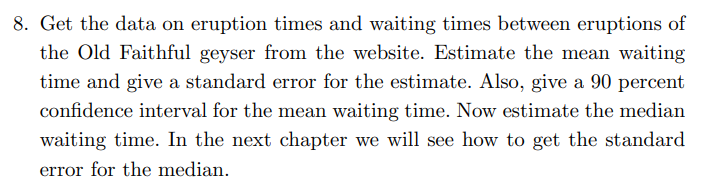

In [329]:
faithful_data = pd.read_csv('faithful.txt', sep = '\t')
faithful_data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [330]:
faithful_data.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [334]:
waiting_mean = faithful_data.waiting.mean()
print("mean waiting time = ", waiting_mean)

mean waiting time =  70.8970588235294


In [335]:
waiting_se = faithful_data.waiting.std() / np.sqrt(faithful_data.waiting.count())

print("standard error = ", se)

standard error =  0.8243163663775168


By CLT, we expect the mean to be roughly normally distributed

In [337]:
waiting0 = waiting_mean + norm.ppf(0.05) * waiting_se
waiting1 = waiting_mean + norm.ppf(0.95) * waiting_se

print("90% confidence interval is ({}, {})".format(waiting0, waiting1))


90% confidence interval is (69.54117905853789, 72.25293858852092)


In [339]:
waiting_median = faithful_data.waiting.median()

print("median = ", waiting_median)

median =  76.0


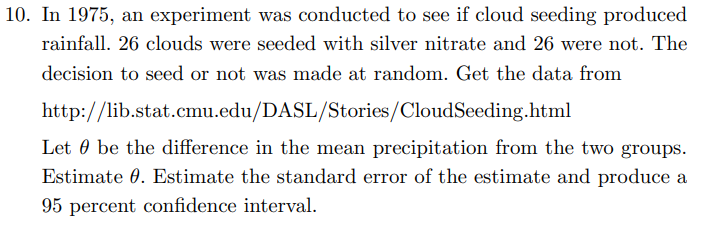

In [343]:
seeding_data = pd.read_csv('cloud_seeding.csv')
seeding_data.head()

,Unseeded_Clouds,Seeded_Clouds
0,1202.6,2745.6
1,830.1,1697.8
2,372.4,1656.0
3,345.5,978.0
4,321.2,703.4


In [344]:
seeding_data.describe()

,Unseeded_Clouds,Seeded_Clouds
count,26.000000,26.000000
mean,164.588462,441.984615
std,278.426404,650.787171
min,1.000000,4.100000
25%,24.825000,98.125000
50%,44.200000,221.600000
75%,159.200000,406.025000
max,1202.600000,2745.600000


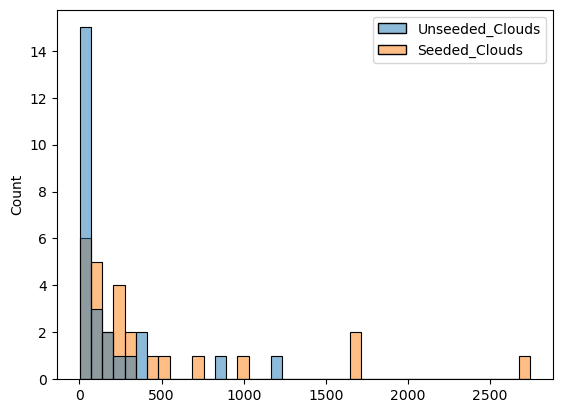

In [363]:
import seaborn as sns
sns.histplot(seeding_data, bins=40)
plt.show()

Here I naively use a normal distribution to calculate the standard error of $\hat{\mu}$

In [349]:
Clouds_theta = seeding_data.Seeded_Clouds.mean() - seeding_data.Unseeded_Clouds.mean()

Clouds_se = np.sqrt((seeding_data.Seeded_Clouds.var() / seeding_data.Seeded_Clouds.count() + seeding_data.Unseeded_Clouds.var() / seeding_data.Seeded_Clouds.count() ))

print("theta = {}, se = {}".format(Clouds_theta, Clouds_se))

theta = 277.3961538461539, se = 138.81991721642947


In [350]:
clouds_C0 = Clouds_theta + norm.ppf(0.025) * Clouds_se
clouds_C1 = Clouds_theta + norm.ppf(0.975) * Clouds_se

print("Clouds confidence interval = ", (clouds_C0, clouds_C1))

Clouds confidence interval =  (5.3141157651202775, 549.4781919271875)
